In [1]:
from matplotlib import pyplot as plt
import pickle
import numpy as np

In [2]:
with open('performance_data_file_without_depth_2_3.pkl', 'rb') as f:
    runtimes = pickle.load(f)
runtimes.keys()
scenario_names = ["CSP-2010",
        "QBF-2016",
        "ASP-POTASSCO",
        "SAT12-HAND",
        "MAXSAT15-PMS-INDU",
        "SAT12-INDU",
        "CPMP-2015",]

In [3]:
average_runtimes = {scenario_name: {} for scenario_name in scenario_names}
for appraoch_name, appraoch_data in runtimes.items():
    for scenario_name, scenario_data in sorted(list(appraoch_data.items())):
        avg_runtime = np.average(list(scenario_data.values()))
        average_runtimes[scenario_name][appraoch_name] = avg_runtime
        
    

In [4]:
with open('performance_data_file_with_depth_2_3.pkl', 'rb') as f:
    runtimes = pickle.load(f)
runtimes.keys()
scenario_names = ["CSP-2010",
        "QBF-2016",
        "ASP-POTASSCO",
        "SAT12-HAND",
        "MAXSAT15-PMS-INDU",
        "SAT12-INDU",
        "CPMP-2015",]

In [5]:
for appraoch_name, appraoch_data in runtimes.items():
    for scenario_name, scenario_data in sorted(list(appraoch_data.items())):
        avg_runtime = np.average(list(scenario_data.values()))
        average_runtimes[scenario_name][appraoch_name] = avg_runtime

In [6]:
average_runtimes

{'CSP-2010': {'per_algo_regressor': 0.1459532,
  'survival_forest': 118.6517532,
  'BinaryDecisionTree__depth_1': 77.2650859,
  'BinaryDecisionTree__depth_4': 233.27809540000004,
  'BinaryDecisionTree__depth_2': 123.49962239999999,
  'BinaryDecisionTree__depth_3': 171.7538625},
 'QBF-2016': {'per_algo_regressor': 0.6460227,
  'survival_forest': 429.9827514,
  'BinaryDecisionTree__depth_1': 29.095482600000004,
  'BinaryDecisionTree__depth_4': 112.3557963,
  'BinaryDecisionTree__depth_2': 51.453353199999995,
  'BinaryDecisionTree__depth_3': 77.23935429999999},
 'ASP-POTASSCO': {'per_algo_regressor': 1.2776052999999998,
  'survival_forest': 822.6592598,
  'BinaryDecisionTree__depth_1': 108.3034537,
  'BinaryDecisionTree__depth_4': 376.6946411,
  'BinaryDecisionTree__depth_2': 183.10279150000002,
  'BinaryDecisionTree__depth_3': 269.49757680000005},
 'SAT12-HAND': {'per_algo_regressor': 1.5425166,
  'survival_forest': 789.9338917,
  'BinaryDecisionTree__depth_1': 61.8942132,
  'BinaryDecis

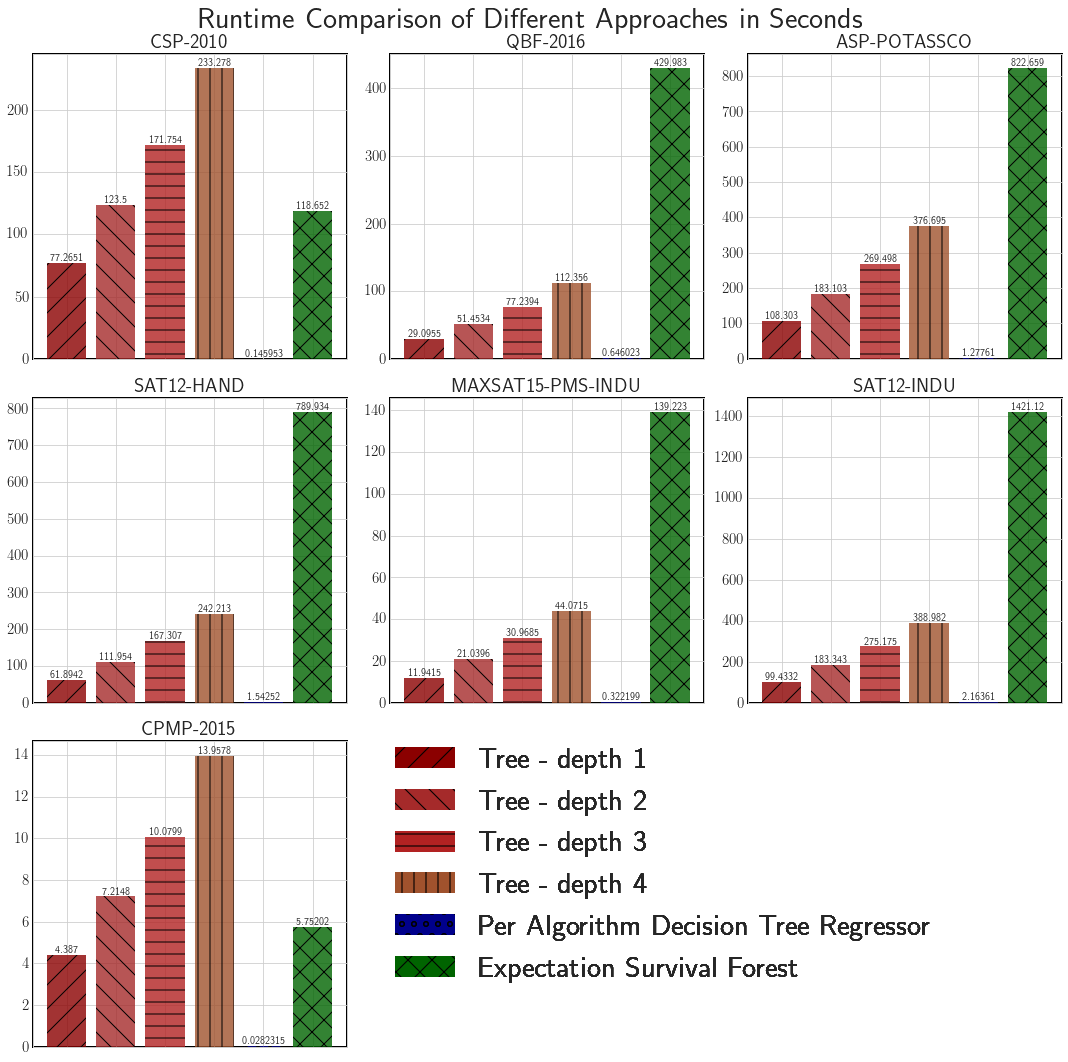

In [8]:
plt.style.use("seaborn-whitegrid")

plt.rcParams.update({"text.usetex": True})

fig, axs = plt.subplots(3,3)
axs = axs.flatten()
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
fig.set_size_inches(15, 15,)
for scenario_number, scenario_name in enumerate(scenario_names):
    axs[scenario_number].patch.set_edgecolor("black")
    axs[scenario_number].patch.set_linewidth("2")
    axs[scenario_number].patch.set_edgecolor("black")
    axs[scenario_number].patch.set_linewidth("2")
    keys = sorted(list(average_runtimes[scenario_name].keys()))
    values = [average_runtimes[scenario_name][key] for key in keys]
    rects = axs[scenario_number].bar(keys, values, color = ['darkred', 'brown', 'firebrick', 'sienna', 'darkblue', 'darkgreen'], alpha = 0.8)
    patterns = ['/']  + ['\\'] +  [ '-'] + [ '|'] + ['o'] + ['x']
    for pattern, bar in zip(patterns, axs[scenario_number].patches):
            bar.set_hatch(pattern)
             
    axs[scenario_number].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelsize=15,)
    axs[scenario_number].tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=15,)
    axs[scenario_number].set_title(scenario_name, fontsize=20)
    for bars in axs[scenario_number].containers:
        axs[scenario_number].bar_label(bars)
    
    fig.legend([rects[0], rects[1], rects[2], rects[3], rects[4], rects[5] ],['Tree - depth 1', 'Tree - depth 2', 'Tree - depth 3', 'Tree - depth 4', 'Per Algorithm Decision Tree Regressor', 'Expectation Survival Forest'], bbox_to_anchor=(0.395   , -0.18, 0.5, 0.5), prop = {'size': 30})
fig.suptitle('Runtime Comparison of Different Approaches in Seconds', fontsize=30)
fig.tight_layout()
plt.savefig('Runtime Comparison of Different Approaches')
plt.show()